## **Installing Packages**



In [1]:
!pip install easyocr
!pip install opencv-python
!apt-get install poppler-utils
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 16 kB/s 
     |████████████████████████████████| 47.6 MB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (294 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155639 f

# Importing Packages


In [2]:
import easyocr
import numpy as np
import PIL
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import nltk
import re 
import cv2

Downloading Packages

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Mounting Google Drive

In [4]:
import sys                                                                              #THIS IS FOR GOOGLE COLAB USERS ONLY
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys                                                                              #THIS IS FOR GOOGLE COLAB USERS ONLY
from google.colab import files
sys.path.insert(0,'/content/drive/MyDrive/sampleresumes')

# **EasyOCR**

In [6]:
reader = easyocr.Reader(['en'] , gpu = True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## **Image Pre-Processing**

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

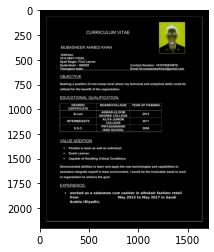

In [15]:
from tensorflow.keras.preprocessing import image

img = cv2.imread('/content/drive/MyDrive/sampleresumes/1/page0.jpeg')
img = image.img_to_array(img, dtype='uint8')
# gray = get_grayscale(img)
# thresh = thresholding(gray)
# denoise = remove_noise(gray)
# cannied = canny(denoise)
# opn = opening(denoise)
# dil = dilate(denoise)
# er = erode(gray)
img = cv2.bitwise_not(img)
plt.imshow(img)
plt.show()

In [16]:
cv2.imwrite('/content/drive/MyDrive/sampleresumes/1/0.jpeg', img)

True

In [17]:
IMG_PATH = "/content/drive/MyDrive/sampleresumes/1/0.jpeg"
result = reader.readtext(IMG_PATH)
result

[([[460, 202], [908, 202], [908, 250], [460, 250]],
  'CURRICULUM VITAE',
  0.873603527806101),
 ([[205, 354], [729, 354], [729, 397], [205, 397]],
  'MUBASHEER AHMED KHAN',
  0.7772237807991412),
 ([[208, 436], [344, 436], [344, 468], [208, 468]],
  'Address:',
  0.9982982387076196),
 ([[197, 469], [457, 469], [457, 507], [197, 507]],
  '10-5-385/1/1/D2A,',
  0.606416605174266),
 ([[197, 503], [567, 503], [567, 548], [197, 548]],
  'Syed Nagar, First Lancer',
  0.7454151405601864),
 ([[197, 541], [363, 541], [363, 579], [197, 579]],
  'Hyderabad',
  0.9999981721233916),
 ([[388, 542], [498, 542], [498, 574], [388, 574]],
  '500028',
  0.9999420112573251),
 ([[905, 539], [1391, 539], [1391, 575], [905, 575]],
  'Contact Number: +919182834870',
  0.9741333888685255),
 ([[196, 574], [439, 574], [439, 616], [196, 616]],
  'Telangana state',
  0.9860505291442835),
 ([[904, 574], [1455, 574], [1455, 615], [904, 615]],
  'Email Id:mubasheerkhan@gmail com',
  0.7611797958877852),
 ([[195, 651

Drawing Bounding Boxes & Extracting Text

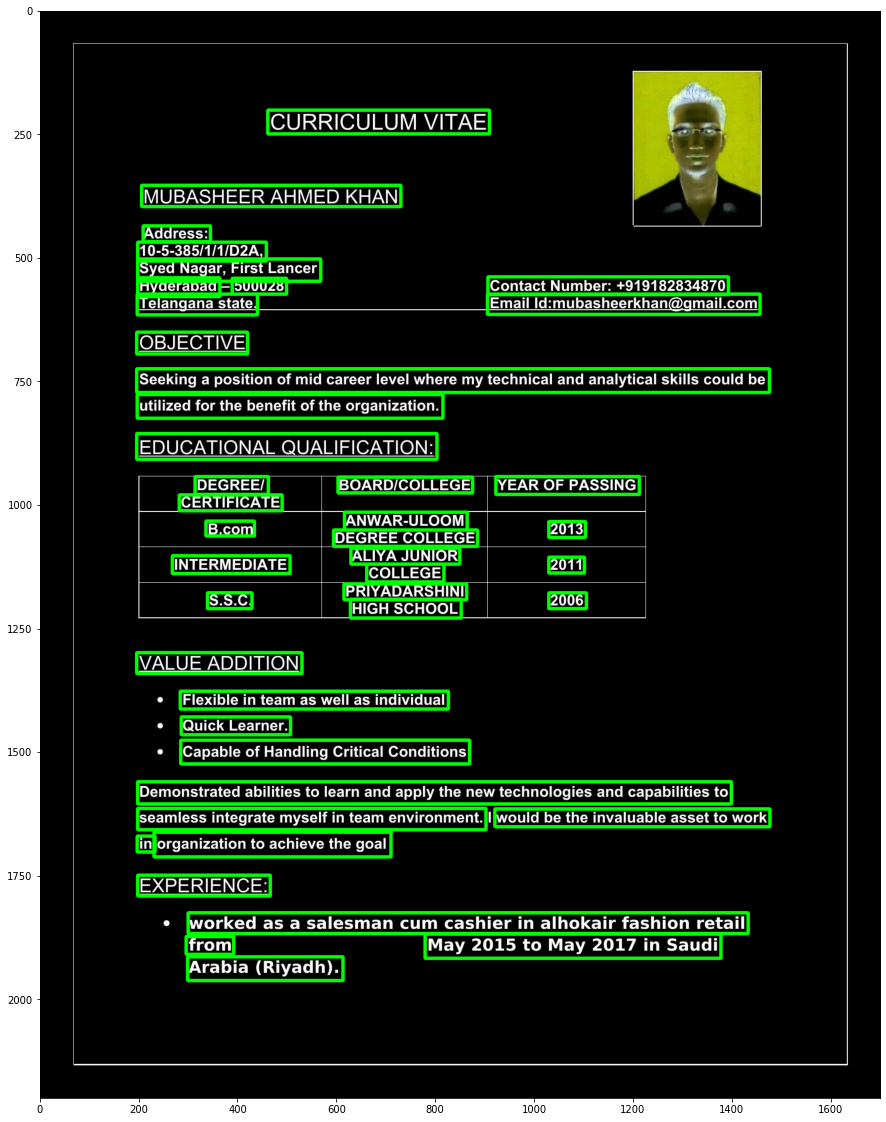

In [18]:
content = ""
img = cv2.imread(IMG_PATH)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  content = content + text + '\n'
  img = cv2.rectangle(img , top_left , bottom_right , (0,255,0) , 5)
  # font = cv2.FONT_HERSHEY_SIMPLEX
  # img = cv2.putText(img , text , bottom_right , font , 1, (255,0,0) , 2 , cv2.LINE_AA)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()


In [183]:
print(content)

CURRICULUM VITA
PRA VEEN GURUSAMY
Mob: +971 559313185
E-Mail: gppraveenl9E
'gmailcom
Work Experience: 8 years
Objective:
Im a Diploma Holder. Dynamic, self-motivated, confident, excellent communication and special
tasks in handling the electrical and air-conditioning jobs Having a total of 8 years' experience in
the same field:
Handle the job with great sense of responsibility and always expect to make a
positive contribution and prove myself an asset to the organization that employs me_
Brief Employment History:
Organization
Idama Facility Management Solutions
Site
Jumeirah Beach Residence, Dubai
Designation
Multi Technician
as well as Team Leader
Period
From March-2016 to Till Date
Organization
CBRE South Asia Pvt: Ltd:
Site
Flextronics, HCL Technologies
Chennai
Designation
Facility Executive
Period
From March-2013 to May-2015
Organization
Goms Electrical Company
Site
HCL Technologies Ltd
Chennai
Designation
Technical Supervisor
Period
From October-2009 to February-2013
Organization


## **Extracting Name**

In [19]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

ignore_text1 = "CURRICULUM"
ignore_text2 = "VITAE"

matcher = Matcher(nlp.vocab)

def extract_name(content):
    nlp_text = nlp(content)
    
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern])
    
    matches = matcher(nlp_text)

    for match_id, start, end in matches:
        span = nlp_text[start:end]
        if not(ignore_text1 in span.text or ignore_text2 in span.text) :
            return span.text
        
    return ""

In [20]:
personName = extract_name(content)
personName

'AHMED KHAN'

## **Extracting Phone Number**

In [21]:
PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]')
def extract_phone_number(resume_text):
    phone = re.findall(PHONE_REG, resume_text)
    if phone:
        number = ''.join(phone[0])
 
        if resume_text.find(number) >= 0 and len(number) < 16:
            return number
    return None

In [22]:
contactNum = extract_phone_number(content)
contactNum

'+919182834870'

## **Extracting Email Address**

In [23]:
EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+')
# EMAIL_REG = re.compile(r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]')

def extract_emails(resume_text):
    return re.findall(EMAIL_REG, resume_text)

In [24]:
emailID = extract_emails(content)
emailID

[]